In [1]:
import math
import random
import time
import numpy as np

### Создание данных

In [2]:
def create(size=random.randint(3, 100)):
    coord_x = []
    coord_y = []
    for i in range(size):
        coord_x.append(random.uniform(-100, 100))
        coord_y.append(random.uniform(-100, 100))
        
    with open("data_points.txt", 'w') as file:
        for i in range(len(coord_x)):
            x = coord_x[i]
            y = coord_y[i]
            l = str(x) + ' ' + str(y) + '\n'
            file.write(l)

In [3]:
create()

### Считывание данных

In [37]:
def reader(file_name):
    A = []
    with open("data_points.txt", 'r') as file:
        while True:
            line = file.readline()
            if not line:
                break
            line_split = line.split()
            A.append((float(line_split[0]), float(line_split[1])))
            
    return A

In [38]:
A = reader("data_points.txt")

In [39]:
P = reader("data_points.txt")

In [40]:
print(A)

[(0.0, 0.0), (2.0, 0.0), (0.0, 2.0), (2.0, 2.0), (1.0, 1.0)]


### Создание основных функций

In [8]:
def get_length(v):
    return math.sqrt(v[0] ** 2 + v[1] ** 2)

In [9]:
def angle(v):
    if get_length(v) == 0:
        return 0
    elif v[0] >= 0:
        return math.acos((0 * v[0] + -1 * v[1])/(get_length(v)))
    elif v[1] >= 0:
        return (math.acos((0 * v[0] + -1 * v[1])/(get_length(v))) + np.pi)
    else:
        return (math.acos((0 * v[0] + -1 * v[1])/(get_length(v))) + (3 * np.pi) / 2)

In [10]:
def is_bigger(p, x):
    if angle(p) > angle(x):
        return True
    elif angle(p) == angle(x):
        if get_length(p) > get_length(x):
            return True
    return False

In [11]:
def is_smaller(p, x):
    if angle(p) < angle(x):
        return True
    elif angle(p) == angle(x):
        if get_length(p) < get_length(x):
            return True
    else:
        return False

### Реализация рандомизированной быстрой сортировки

In [12]:
def Partition(A, p, r):
    x = A[random.randint(p, r)]
    i = p
    j = r
    while i < j:
        while is_smaller(x, A[j]):
            j -= 1
        while is_bigger(x, A[i]):
            i += 1
        if i < j:
            A[i], A[j] = A[j], A[i]
            
        else:
            return j

In [13]:
def Randomized_Quick_Sort(A, p, r):
    if p < r:
        q = Partition(A, p, r)
        Randomized_Quick_Sort(A, p, q)
        Randomized_Quick_Sort(A, q+1, r)

### Реализация алгоритма Грэма с рандомизированной быстрой сортировкой

In [14]:
def isLeft(p1, p2, p3):
    #если косое произведение двух векторов больше нуля, то повотор от первого вектора ко второму идет против часовой стрелки
    vec1 = [p2[0] - p1[0], p2[1] - p1[1]]
    vec2 = [p3[0] - p1[0], p3[1] - p1[1]]
    
    if (vec1[0] * vec2[1] - vec1[1] * vec2[0]) > 0:
        return True
    
    return False

In [15]:
def Graham_Algorithm_with_Randomized_Quick_Sort(A):
    start_rqs = time.time()
    #шаг 1: найти новое начало координат (точку с минимальной абсциссой и ординатой)
    n = len(A) #число точек
    min_x = []
    p = min(A, key=lambda x: x[0])
    
    for i in range(n):
        if A[i][0] == p[0]:
            min_x.append(A[i])
            
    for x in min_x:
        if x[1] < p[1]:
            p = x
            
    #шаг 2: перенести начало координат
            
    A = [(A[i][0] - p[0], A[i][1] - p[1]) for i in range(n)]
    
    #шаг 3: упорядочить точки по увеличению угла точек в полярных координатах
    
    Randomized_Quick_Sort(A, 0, len(A)-1)

    #шаг 4: создать стек, положить 2 минимальные точки
    
    S = [A[0], A[1]]
    
    A.remove(A[0])
    A.remove(A[0])
    
    while A:
        if isLeft(S[-2], S[-1], A[0]):
            S.append(A[0])
            A.remove(A[0])
        else:
            if len(S) >= 3:
                S.pop()
            elif len(S) == 2:
                S.pop()
                S.append(A[0])
                A.remove(A[0])
                
    #шаг 5: вернуть назад начало координат
    
    S = [(S[i][0] + p[0], S[i][1] + p[1]) for i in range(len(S))]
    
    time_rqs = time.time() - start_rqs
    
    return S, time_rqs

In [41]:
S1, t1 = Graham_Algorithm_with_Randomized_Quick_Sort(A)

### Реализация 3-кучи

In [17]:
#поиск родителя
def p(i):
    if i != 0:
        return (i-1) // 3
    else:
        return -1

In [18]:
def emersion(i, A):
    j1 = i
    j2 = p(i)
    if (j2 != -1) and (is_smaller(A[j1], A[j2])):
        A[j1], A[j2] = A[j2], A[j1]
        emersion(j2, A)

In [19]:
def make_3_heap(A):
    for i in range(len(A)):
        emersion(i, A)

In [20]:
def delete_min(A):
    A[0], A[-1] = A[-1], A[0]
    A.pop()
    for i in range(len(A)):
        emersion(i, A)

### Реализация Алгоритма Грэма на основе 3-кучи

In [21]:
def Graham_Algorithm_with_3_heap(A):
    start_3h = time.time()
    #шаг 1: найти новое начало координат (точку с минимальной абсциссой и ординатой)
    n = len(A) #число точек
    min_x = []
    p = min(A, key=lambda x: x[0])
    
    for i in range(n):
        if A[i][0] == p[0]:
            min_x.append(A[i])
            
    for x in min_x:
        if x[1] < p[1]:
            p = x
            
    #шаг 2: перенести начало координат
            
    A = [(A[i][0] - p[0], A[i][1] - p[1]) for i in range(n)]
    
    #шаг 3: упорядочить точки по увеличению угла точек в полярных координатах
    
    make_3_heap(A)
    
    #шаг 4: создать стек, положить 2 минимальные точки
    
    S = []
    
    S.append(A[0])
    
    delete_min(A)
    
    S.append(A[0])
    
    delete_min(A)
    
    while A:
        if isLeft(S[-2], S[-1], A[0]):
            S.append(A[0])
            delete_min(A)
        else:
            if len(S) >= 3:
                S.pop()
            elif len(S) == 2:
                S.pop()
                S.append(A[0])
                delete_min(A)
                
    #шаг 5: вернуть назад начало координат
    
    S = [(S[i][0] + p[0], S[i][1] + p[1]) for i in range(len(S))]
    
    time_3h = time.time() - start_3h
    
    return S, time_3h

In [42]:
S2, t2 = Graham_Algorithm_with_3_heap(A)

In [43]:
print(S1)

[(0.0, 0.0), (2.0, 0.0), (2.0, 2.0), (0.0, 2.0)]


In [44]:
print(len(S1))

4


In [45]:
print(S2)

[(0.0, 0.0), (2.0, 0.0), (2.0, 2.0), (0.0, 2.0)]


In [46]:
print(len(S2))

4


In [27]:
S1 == S2

True

## Визуализация

In [28]:
import matplotlib.pyplot as plt

In [29]:
def ploting_results(S, P, title):
    x_all = []
    y_all = []
    for point in P:
        x_all.append(point[0])
        y_all.append(point[1])
    
    x_res = []
    y_res = []
    for point in S:
        x_res.append(point[0])
        y_res.append(point[1])
        
    x_res.append(S[0][0])
    y_res.append(S[0][1])
        
    plt.figure(figsize=(12, 7))
    plt.grid()
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.title(title)
        
    plt.scatter(x_all, y_all, color="blue")
    
    plt.plot(x_res, y_res, color="red")
        
    plt.show()

In [30]:
def timer():
    time_rqs = []
    time_3h = []
    size = []
        
    for i in range(10, 155, 5):
        create(i)
        A = reader("data_points.txt")
        size.append(len(A))
        S1, t1 = Graham_Algorithm_with_Randomized_Quick_Sort(A)
        time_rqs.append(t1)
        S2, t2 = Graham_Algorithm_with_3_heap(A)
        time_3h.append(t2)
        
    return time_rqs, time_3h, size

In [31]:
def ploting_timer(time_rqs, time_3h, size):
    plt.figure(figsize=(12, 7))
    plt.grid()
    plt.ylabel('Time, sec')
    plt.xlabel('Size')
    
    line1, = plt.plot(size, time_rqs, color='blue')
    line2, = plt.plot(size, time_3h, color='red')
    
    plt.legend([line1, line2], ['Время с быстрой сортировкой', "Время с 3-кучей"])
    
    plt.show()

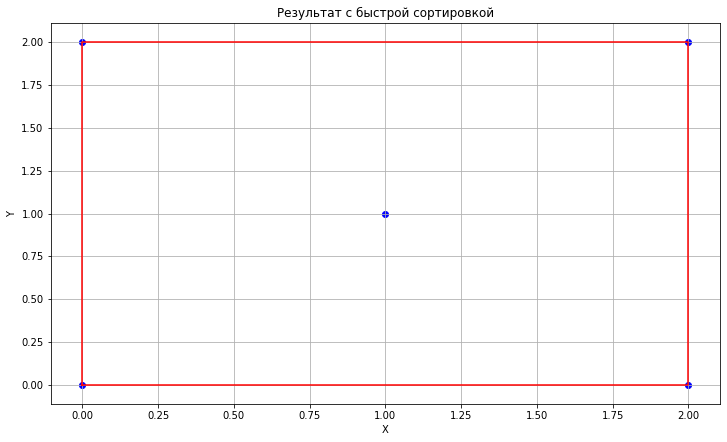

In [47]:
ploting_results(S1, P, "Результат с быстрой сортировкой")

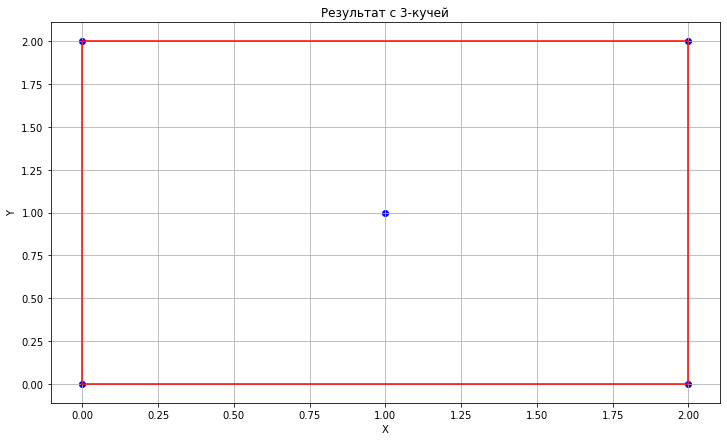

In [48]:
ploting_results(S2, P, "Результат с 3-кучей")

In [34]:
time_rqs, time_3h, size = timer()

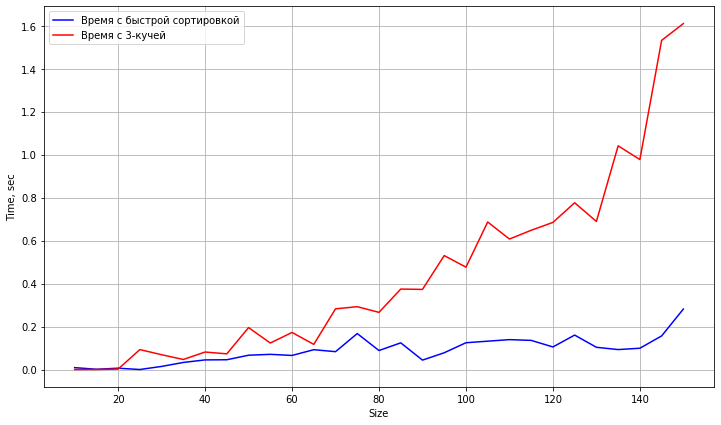

In [35]:
ploting_timer(time_rqs, time_3h, size)

### Запись времени в файл

In [36]:
with open("Graham_time.txt", 'w') as file:
    file.write('Size ' + 'Time Quick Sort ' + 'Time 3-heap' + '\n')
    
    for i in range(len(time_rqs)):
        file.write(str(size[i]) + ' ' + str(time_rqs[i]) + ' ' + str(time_3h[i]) + '\n')